loading IMDA dataset

In [16]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [17]:
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

Decoding reviews back to text

In [18]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

Encoding the integer sequences via multi-hot encoding

In [19]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [20]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [21]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Building your model

Model definition

In [22]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compiling the model

In [23]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Validating your approach

Setting aside a validation set

In [24]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training your model

In [25]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 57ms/step - loss: 0.5511 - accuracy: 0.7640 - val_loss: 0.4269 - val_accuracy: 0.8547
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3482 - accuracy: 0.8903 - val_loss: 0.3266 - val_accuracy: 0.8805
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2639 - accuracy: 0.9099 - val_loss: 0.2909 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2124 - accuracy: 0.9297 - val_loss: 0.2786 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1807 - accuracy: 0.9405 - val_loss: 0.2770 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1515 - accuracy: 0.9507 - val_loss: 0.2940 - val_accuracy: 0.8828
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1331 - accuracy: 0.9577 - val_loss: 0.2904 - val_accuracy: 0.8840
Epoch 8/20
30

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the training and validation loss

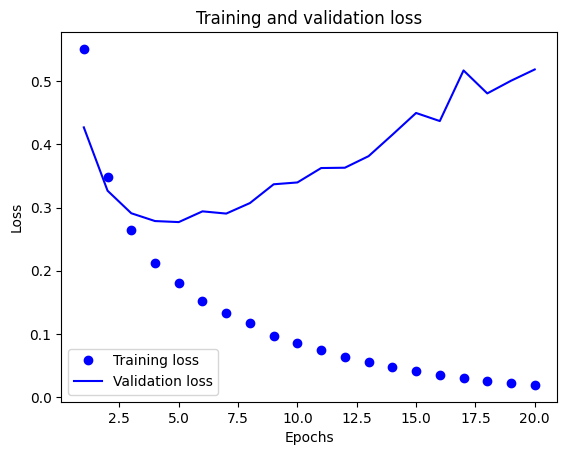

In [27]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the training and validation accuracy

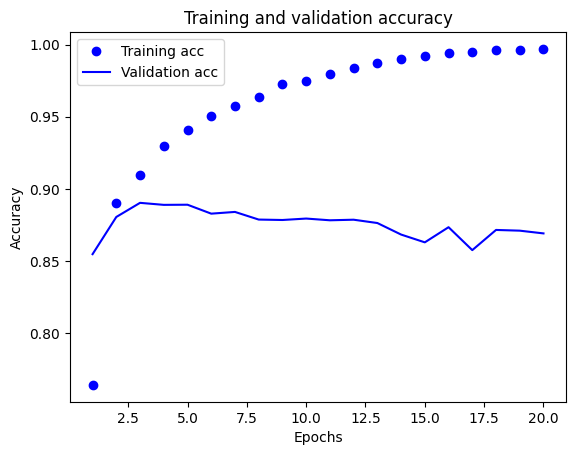

In [28]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining a model from scratch

In [29]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.4669 - accuracy: 0.8173
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2740 - accuracy: 0.9012
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2121 - accuracy: 0.9225
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2919 - accuracy: 0.8822


In [30]:
results

[0.2919412851333618, 0.8822399973869324]